## **Using hyperlinks in MODA and CHADA workflow diagrams**

Hyperlinks can be applied to text within an activity element or to the element itself. Hyperlinks can point to an exteral website (URL) or to a local file *e.g.* another diagram or image. This feature can be used to enrich activity diagrams with further information without spoiling their appearance.

<br>

#### **1. Initial diagram code WITHOUT hyperlinks**

<br>

Here's the puml code for a CHADA workflow diagram for SEM with combined EBSD and EDX:

```
@startuml
!theme MOCHADA-plasma from ../../themes
:Bulk sample or thin film; <<user_case>>
group SEM-EBSD-EDX <<group_collection>>
  :Set up experimental geometry:\n sample tilt (<U+00B0>), working distance (mm),\ndetector distance (mm); <<experiment>>
  :Acquire electron image (SE, BSE, FSE); <<experiment>>
  :Electron image(s); <<raw_data>>
  :Define rectangular ROI, step size,\ndetector and indexing parameters; <<experiment>>
  split
    group EBSD <<group_single>>
      :Acquire EBSD patterns at all points in ROI; <<experiment>>
      :EBSD pattern for each point; <<raw_data>>
      :Hough indexing (automatic); <<data_processing>>
    end group
  split again
    group EDX <<group_single>>
      :Acquire EDX spectra at all points in ROI; <<experiment>>
      :EDX spectrum for each point; <<raw_data>>
      :Analyse composition (automatic) //e.g.//:\nno. counts for element 1 > x; <<data_processing>>
    end group
  end split
  :Assign phase and orientation to each point\n(automatic); <<data_processing>>
  :Euler angles and phase ID\nfor each point in map; <<final_data>>
  :Analysis of orientations (user controlled); <<data_processing>>
  :Orientation maps, Pole figures\nQuantitative measures //e.g.// grain size; <<final_data>>
  detach
end group
@enduml
```
<br>

Let's write this to file and run it:

In [1]:
import pathlib

import mochada_kit.running as mr

**Newline characters within the name of an activity element must be double escaped in a multiline Python string i.e. "\\\\\n"**

(you do not have to do this if you are writing the puml code in a text editor)

In [2]:
puml_code = """@startuml
!theme MOCHADA-plasma from ../../themes
:Bulk sample or thin film; <<user_case>>
group SEM-EBSD-EDX <<group_collection>>
  :Set up experimental geometry:\\n sample tilt (<U+00B0>), working distance (mm),\\ndetector distance (mm); <<experiment>>
  :Acquire electron image (SE, BSE, FSE); <<experiment>>
  :Electron image(s); <<raw_data>>
  :Define rectangular ROI, step size,\\ndetector and indexing parameters; <<experiment>>
  split
    group EBSD <<group_single>>
      :Acquire EBSD patterns at all points in ROI; <<experiment>>
      :EBSD pattern for each point; <<raw_data>>
      :Hough indexing (automatic); <<data_processing>>
    end group
  split again
    group EDX <<group_single>>
      :Acquire EDX spectra at all points in ROI; <<experiment>>
      :EDX spectrum for each point; <<raw_data>>
      :Analyse composition (automatic) //e.g.//:\\nno. counts for element 1 > x; <<data_processing>>
    end group
  end split
  :Assign phase and orientation to each point\\n(automatic); <<data_processing>>
  :Euler angles and phase ID\\nfor each point in map; <<final_data>>
  :Analysis of orientations (user controlled); <<data_processing>>
  :Orientation maps, Pole figures\\nQuantitative measures //e.g.// grain size; <<final_data>>
  detach
end group
@enduml
"""

with pathlib.Path(
    "../gallery/puml_code/chada_workflow_SEM_EBSD_EDX_nested_techniques.puml"
) as f:
    f.write_text(puml_code)

In [3]:
mr.run_plantuml_code(
    pathlib.Path(
        "../gallery/puml_code/chada_workflow_SEM_EBSD_EDX_nested_techniques.puml"
    ),
    output_dir=pathlib.Path("../"),
)

Here's the resulting diagram (we have to us ipython display rather than Markdown to display svg files which have line breaks within elements properly):

In [4]:
from IPython.display import SVG, display

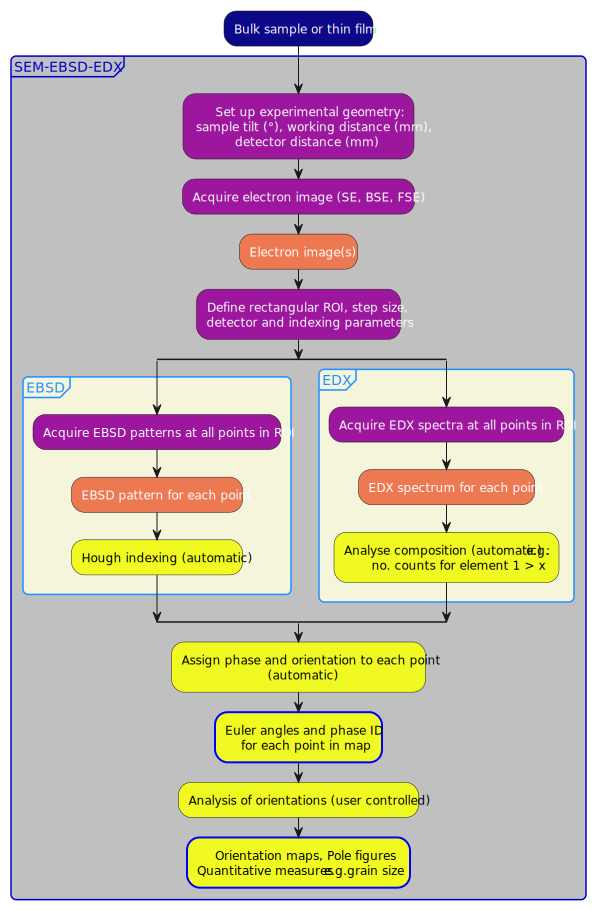

In [5]:
display(SVG(filename="../gallery/chada_workflow_SEM_EBSD_EDX_nested_techniques.svg"))

<br>

#### **2. Adding hyperlinks**

We can add hyperlinks to any text element or to an element itself.

Let's demonstrate this functionality by:

1. linking the title of the single technique group "EBSD" to a local file showing the CHADA tables for EBSD (`mochada_kit/gallery/chada_tables_SEM-EBSD.svg`), and
2. linking the element "Acquire electron image (SE, BSE, FSE)" to a local file showing the metadata for acquiring images as a json diagram (`mochada_kit/gallery/json_SEM_metadata_with_highlights.svg`)

<br>

To do this, we just need to modify two lines of the original puml source code like this:

```
@startuml
!theme MOCHADA-plasma from ../../themes
:Bulk sample or thin film; <<user_case>>
group SEM-EBSD-EDX <<group_collection>>
  :Set up experimental geometry:\n sample tilt (<U+00B0>), working distance (mm),\ndetector distance (mm); <<experiment>>
  [[./json_SEM_metadata_with_highlights.svg{View metadata}]]:Acquire electron image (SE, BSE, FSE); <<experiment>>
  :Electron image(s); <<raw_data>>
  :Define rectangular ROI, step size,\ndetector and indexing parameters; <<experiment>>
  split
    group [[./chada_tables_SEM-EBSD.svg{View EBSD CHADA} EBSD]] <<group_single>>
      :Acquire EBSD patterns at all points in ROI; <<experiment>>
      :EBSD pattern for each point; <<raw_data>>
      :Hough indexing (automatic); <<data_processing>>
    end group
  split again
    group EDX <<group_single>>
      :Acquire EDX spectra at all points in ROI; <<experiment>>
      :EDX spectrum for each point; <<raw_data>>
      :Analyse composition (automatic) //e.g.//:\nno. counts for element 1 > x; <<data_processing>>
    end group
  end split
  :Assign phase and orientation to each point\n(automatic); <<data_processing>>
  :Euler angles and phase ID\nfor each point in map; <<final_data>>
  :Analysis of orientations (user controlled); <<data_processing>>
  :Orientation maps, Pole figures\nQuantitative measures //e.g.// grain size; <<final_data>>
  detach
end group
@enduml
```


<br>

- In the above code, line 6 now additionally contains `[[./json_SEM_metadata_with_highlights.svg{View metadata}]]`. This is located at the beginning of the line *before* the definition of the activity element and therefore the link applies to the whole element. After the two square brackets, the hyperlink is defined. The hyperlink to a local file can be an absolute path or a relative path with respect to the location of the final diagram file (rather than the puml source code). Anything in curly braces after the link definition will appear as a tooltip when the user hovers the mouse over the element.

- In line 10, the title of the group `EBSD` has been wrapped in the link definition: `[[./chada_tables_SEM-EBSD.svg{View EBSD CHADA}EBSD]]`. This means that the hyperlink applies to the text `EBSD` *i.e.* to the title of the group, rather than to the whole group element. Again we have specified a relative path to a local file, some text for the tooltip, and this time, additionally the text for the link, which will appear underlined in the diagram.

- As we have used relative links, as long as the three images are in the same folder, the links will always work.

- Whatever operating system we use, we specify links using posix paths *i.e.* with forward slashes.

- For more information on using hyperlinks in plantuml diagrams, see [here](https://plantuml.com/link)

Let's write (remembering to double escape newline characteres in multiline Python strings) and run this code to see what the diagram looks like:

In [6]:
puml_code = """@startuml
!theme MOCHADA-plasma from ../../themes
:Bulk sample or thin film; <<user_case>>
group SEM-EBSD-EDX <<group_collection>>
  :Set up experimental geometry:\\n sample tilt (<U+00B0>), working distance (mm),\\ndetector distance (mm); <<experiment>>
  [[./json_SEM_metadata_with_highlights.svg{View metadata}]]:Acquire electron image (SE, BSE, FSE); <<experiment>>
  :Electron image(s); <<raw_data>>
  :Define rectangular ROI, step size,\\ndetector and indexing parameters; <<experiment>>
  split
    group "[[./chada_tables_SEM-EBSD.svg{View EBSD CHADA} EBSD]]" <<group_single>>
      :Acquire EBSD patterns at all points in ROI; <<experiment>>
      :EBSD pattern for each point; <<raw_data>>
      :Hough indexing (automatic); <<data_processing>>
    end group
  split again
    group EDX <<group_single>>
      :Acquire EDX spectra at all points in ROI; <<experiment>>
      :EDX spectrum for each point; <<raw_data>>
      :Analyse composition (automatic) //e.g.//:\\nno. counts for element 1 > x; <<data_processing>>
    end group
  end split
  :Assign phase and orientation to each point\\n(automatic); <<data_processing>>
  :Euler angles and phase ID\\nfor each point in map; <<final_data>>
  :Analysis of orientations (user controlled); <<data_processing>>
  :Orientation maps, Pole figures\\nQuantitative measures //e.g.// grain size; <<final_data>>
  detach
end group
@enduml
"""

with pathlib.Path(
    "../gallery/puml_code/chada_workflow_SEM_EBSD_EDX_nested_techniques_with_hyperlinks.puml"
) as f:
    f.write_text(puml_code)

In [7]:
mr.run_plantuml_code(
    pathlib.Path(
        "../gallery/puml_code/chada_workflow_SEM_EBSD_EDX_nested_techniques_with_hyperlinks.puml"
    ),
    output_dir=pathlib.Path("../"),
)

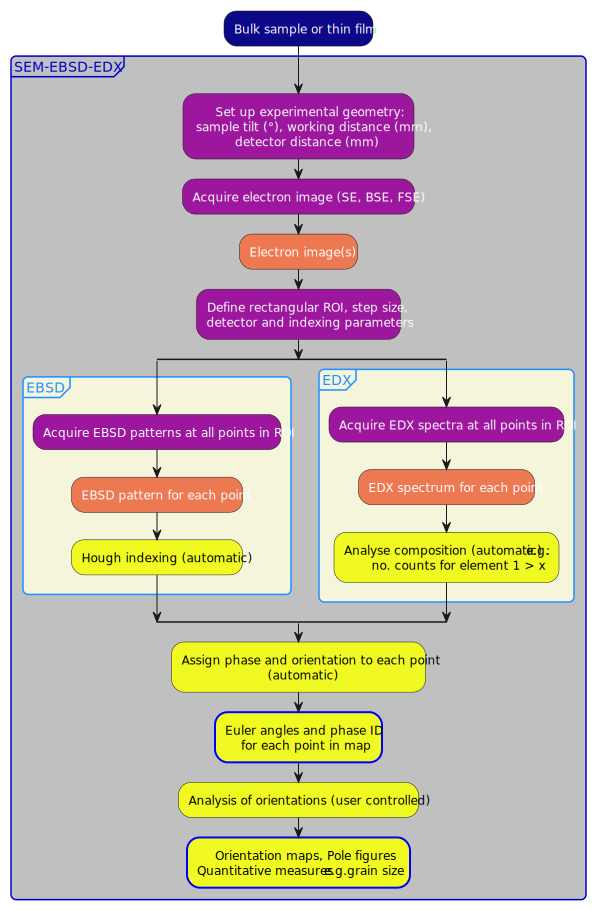

In [8]:
display(
    SVG(
        filename="../gallery/chada_workflow_SEM_EBSD_EDX_nested_techniques_with_hyperlinks.svg"
    )
)

- The only difference in the appearance of the diagram is that the name of the single technique group "EBSD" is now underlined, to show that it is a hyperlink.
- **unfortunately, the hyperlinks don't work when the diagram is displayed in a jupyter notebook**
- **please open the file `chada_kit/gallery/chada_workflow_SEM_EBSD_EDX_nested_techniques_with_hyperlinks.svg` in your browser to try the links**
- you should see that clicking the element `Acquire electron images` takes you to a json diagram showing the metadata with highlights, and that clicking the name of the single technique group `EBSD` takes you to a json diagram showing the CHADA tables for EBSD
- the links open in the same tab with these settings, but this behaviour can be changed, see [here](https://plantuml.com/link)